- Nama : Guido Tamara
- NIM : 1301193303
- Kelas : IF-42-GAB03 / IF-43-09

# **Import Libraries**

In [15]:
import pandas as pd
import numpy as np
import networkx as nx
import nxviz as nv
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

import warnings
warnings.filterwarnings("ignore")

# **Base Data Trayek**
 Data source :http://dishub.jabarprov.go.id/grafik/darat/trayek.html

# **Map Daftar Kota Jawa Barat**

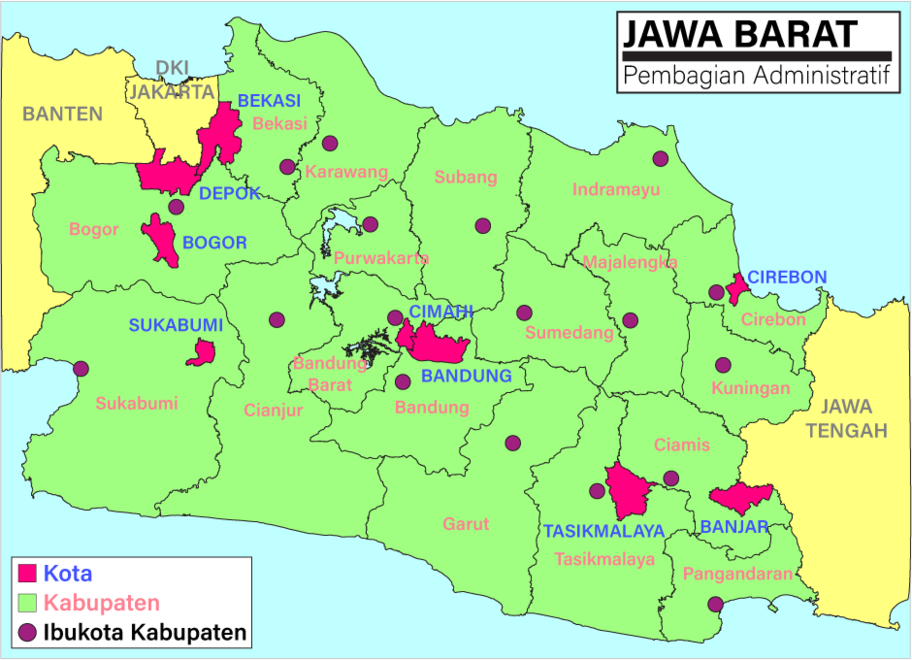

In [6]:
from IPython import display
display.Image("West_Java_province.png")

# **Mapping Setiap Rute Trayek Kota**

In [105]:
df = pd.read_csv('Trayek_Antar_Kota_Jawa_Barat.csv')
df

,from,to
0,Kota Bandung,Kota Banjar
1,Kota Bandung,Kota Bogor
2,Kota Bandung,Kota Cimahi
3,Kota Bandung,Kota Cirebon
4,Kota Bandung,Kota Tasikmalaya
5,Kota Banjar,Kota Sukabumi
6,Kota Bekasi,Kota Bandung
7,Kota Bogor,Kota Bandung
8,Kota Bogor,Kota Bekasi
9,Kota Bogor,Kota Cirebon


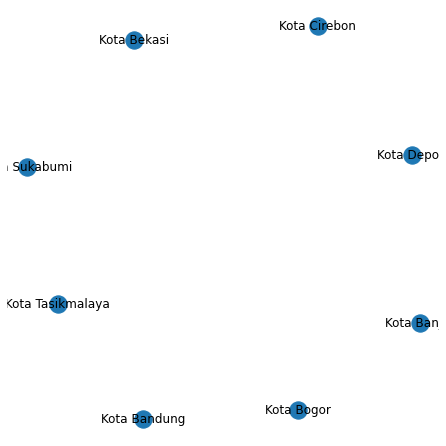

In [70]:
#Inisiasi nodes kota-kota besar di Jawa Barat
G = nx.Graph()
G.add_nodes_from(df['from'])
G.nodes()
fig = plt.figure(1, figsize=(6, 6))
nx.draw(G, with_labels=True, font_weight='normal')
plt.show()

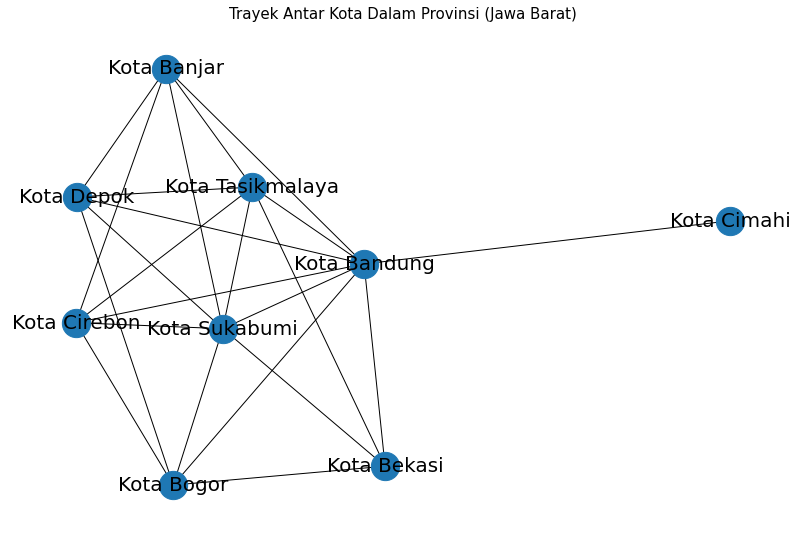

In [106]:
#Membuat graph dengan networkx
graph = nx.from_pandas_edgelist(df, source ="from", target = "to")
type(graph)

#Pembuatan edges trayek data antar kota besar di Jawa Barat
plt.figure(1,figsize=(11,7)) 
pos=nx.spring_layout(graph,iterations=20)
nx.draw(graph, node_size=800, font_size=20, pos=pos, with_labels=True)
plt.title("Trayek Antar Kota Dalam Provinsi (Jawa Barat)", size=15)
plt.show()

# **Degree Centrality**

In [154]:
degree = nx.degree_centrality(graph)

df = pd.DataFrame(sorted(degree.items(), reverse=True), columns=['Kota', 'Nilai Degree'])
df

,Kota,Nilai Degree
0,Kota Tasikmalaya,0.750
1,Kota Sukabumi,0.875
2,Kota Depok,0.625
3,Kota Cirebon,0.625
4,Kota Cimahi,0.125
5,Kota Bogor,0.625
6,Kota Bekasi,0.500
7,Kota Banjar,0.625
8,Kota Bandung,1.000


9


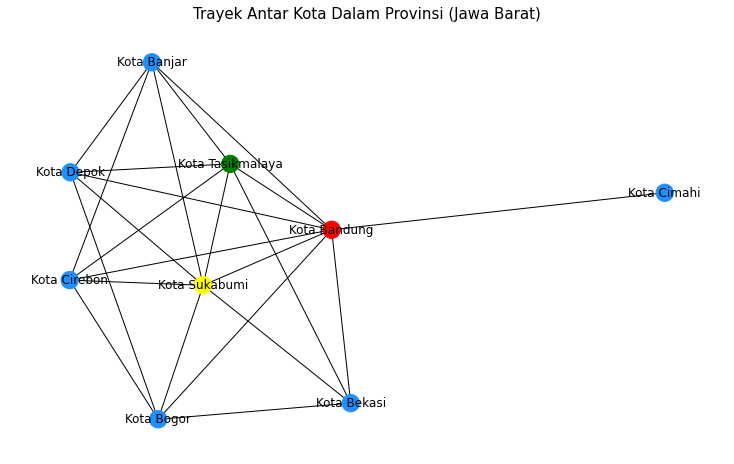

In [155]:
degree = nx.degree_centrality(graph)
sortedcD = sorted(degree.items(), key=lambda kv: kv[1])
sortedcD.reverse()
print(len(sortedcD))

colors = []
for node in graph:
    if node in sortedcD[0]:
        colors.append('red')
    elif node in sortedcD[1]:
        colors.append('yellow')
    elif node in sortedcD[2]:
        colors.append('green')
    else:
        colors.append('dodgerblue')

fig = plt.figure(figsize=(10,6))        
nx.draw(graph,pos, with_labels = 'true',node_color = colors)
plt.title("Trayek Antar Kota Dalam Provinsi (Jawa Barat)", size=15)
plt.show()

# **Betweenness Centrality**

In [156]:
beetwenness = nx.betweenness_centrality(graph)

df = pd.DataFrame(sorted(beetwenness.items(), reverse=True), columns=['Kota', 'Nilai Betweenness'])
df

,Kota,Nilai Betweenness
0,Kota Tasikmalaya,0.036905
1,Kota Sukabumi,0.052976
2,Kota Depok,0.016071
3,Kota Cirebon,0.016071
4,Kota Cimahi,0.000000
5,Kota Bogor,0.025000
6,Kota Bekasi,0.007143
7,Kota Banjar,0.007143
8,Kota Bandung,0.302976


9


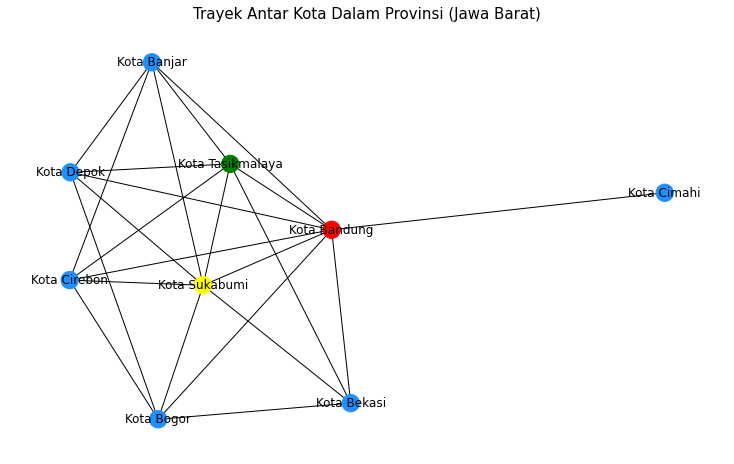

In [157]:
sortedcB = sorted(beetwenness.items(), key=lambda kv: kv[1])
sortedcB.reverse()
print(len(sortedcB))

colors = []
for node in graph:
    if node in sortedcB[0]:
        colors.append('red')
    elif node in sortedcB[1]:
        colors.append('yellow')
    elif node in sortedcB[2]:
        colors.append('green')
    else:
        colors.append('dodgerblue')

fig = plt.figure(figsize=(10,6))        
nx.draw(graph,pos, with_labels = 'true',node_color = colors)
plt.title("Trayek Antar Kota Dalam Provinsi (Jawa Barat)", size=15)
plt.show()

# **Kesimpulan**

Dari hasil Degree Centrality dan Betweenness Centrality berikut adalah 
3 kota terpenting untuk menghubungkan kota-kota besar di Jawa Barat adalah Kota Bandung, disusul oleh Kota Tasikmalaya dan Kota Sukabumi.